In [ ]:
import pandas as pd

# Load the CSV file (correct filename and capitalization)
df = pd.read_csv('/content/Phishing_Email.csv')

# Show the first few rows
df.head()



,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download the necessary resource.
nltk.download('punkt_tab')

# Make a copy of the data
df_cleaned = df.copy()

# Define a cleaning function
def clean_text(text):
    # Check if the text is a string, handle NaN values
    if isinstance(text, str):
        # Lowercase
        text = text.lower()
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Tokenize
        words = word_tokenize(text)
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        words = [word for word in words if word not in stop_words]
        return " ".join(words)
    else:
        # Return empty string or NaN if not a string (e.g., for NaN values)
        return ""  # or return float('nan') to keep NaN values

# Apply the function to the Email Text column
df_cleaned['clean_text'] = df_cleaned['Email Text'].apply(clean_text)

# Show sample
df_cleaned[['Email Text', 'clean_text', 'Email Type']].head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Email Text,clean_text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",6 1100 disc uniformitarianism 1086 sex lang di...,Safe Email
1,the other side of * galicismos * * galicismo *...,side galicismos galicismo spanish term names i...,Safe Email
2,re : equistar deal tickets are you still avail...,equistar deal tickets still available assist r...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,hello hot lil horny toy one dream open minded ...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,software incredibly low prices 86 lower draper...,Phishing Email


In [ ]:
from collections import Counter

# Separate texts by type
phishing_texts = df_cleaned[df_cleaned['Email Type'] == 'Phishing Email']['clean_text']
safe_texts = df_cleaned[df_cleaned['Email Type'] == 'Safe Email']['clean_text']

# Combine all words into a single list for each type
phishing_words = " ".join(phishing_texts).split()
safe_words = " ".join(safe_texts).split()

# Count word frequencies
phishing_freq = Counter(phishing_words)
safe_freq = Counter(safe_words)

# Show top 10 most common words
print("Top words in Phishing Emails:")
print(phishing_freq.most_common(10))

print("\nTop words in Safe Emails:")
print(safe_freq.most_common(10))


Top words in Phishing Emails:
[('â', 7112), ('email', 6560), ('1', 4557), ('free', 4310), ('2', 4017), ('3', 3977), ('com', 3974), ('get', 3868), ('company', 3859), ('information', 3824)]

Top words in Safe Emails:
[('enron', 19271), ('university', 17181), ('language', 16842), ('1', 14039), ('one', 11384), ('ect', 11002), ('2', 10900), ('would', 10833), ('information', 10813), ('email', 10665)]


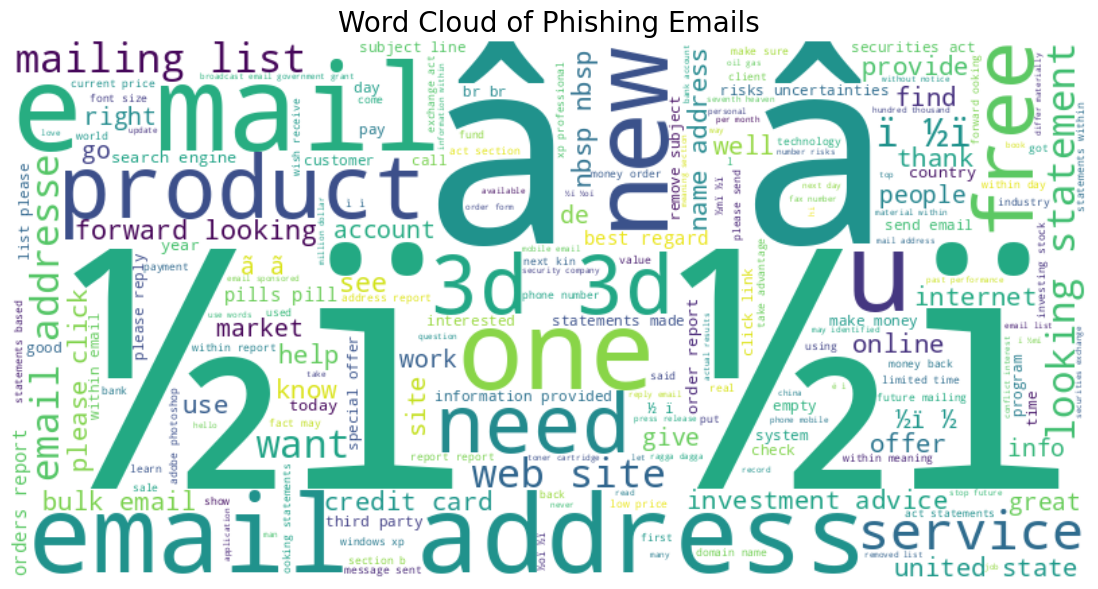

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter phishing emails
phishing_emails = df_cleaned[df_cleaned['Email Type'] == 'Phishing Email']

# Combine all the clean_text into one big string
phishing_text = " ".join(phishing_emails['clean_text'])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(phishing_text)

# Display it
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Phishing Emails", fontsize=20)
plt.show()


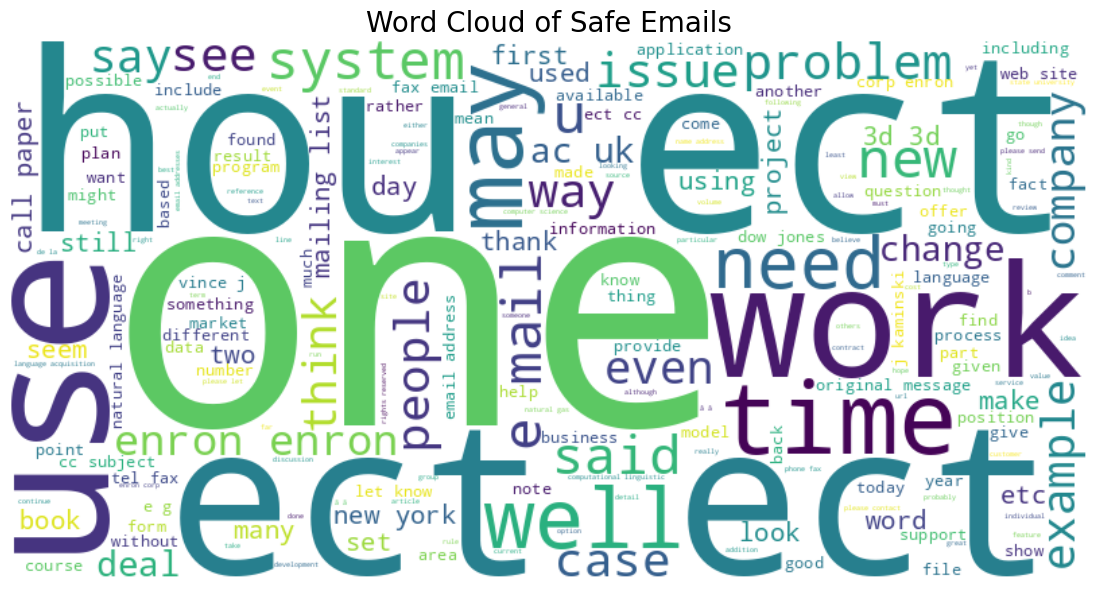

In [ ]:
# Filter safe emails
safe_emails = df_cleaned[df_cleaned['Email Type'] == 'Safe Email']

# Combine all the clean_text into one string
safe_text = " ".join(safe_emails['clean_text'])

# Create the word cloud
safe_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(safe_text)

# Display it
plt.figure(figsize=(15, 7))
plt.imshow(safe_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Safe Emails", fontsize=20)
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Encode the 'Email Type' column: 1 for Phishing, 0 for Safe
df_cleaned['label'] = df_cleaned['Email Type'].apply(lambda x: 1 if x == 'Phishing Email' else 0)

# Define features and labels
X = df_cleaned['clean_text']  # Cleaned email text
y = df_cleaned['label']       # Binary target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into TF-IDF vectors
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Logistic Regression classifier
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_tfidf)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Accuracy: 0.9699731903485255

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      2273
           1       0.96      0.96      0.96      1457

    accuracy                           0.97      3730
   macro avg       0.97      0.97      0.97      3730
weighted avg       0.97      0.97      0.97      3730

🧮 Confusion Matrix:
 [[2214   59]
 [  53 1404]]
